In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
raw = pd.read_excel('Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls', sheet_name=None)

In [5]:
raw.keys()

dict_keys(['Information', 'Training_Data', 'Test_Data'])

In [94]:
data = pd.concat([raw['Training_Data'], raw['Test_Data']], ignore_index=True)

In [95]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...


In [96]:
data = data.iloc[:,:6]

In [97]:
data.columns = data.columns.str.strip()

In [98]:
data['UNS'] = data.UNS.str.lower().replace('very low', 'very_low')

In [105]:
data.UNS = data.UNS.astype(pd.CategoricalDtype(categories=['high', 'middle', 'low', 'very_low'], ordered=True))

In [112]:
km_model = KMeans(n_clusters=2, max_iter=100, random_state=123).fit(data.drop('UNS', axis=1))

In [113]:
data['cluster'] = km_model.labels_ + 1
data

,STG,SCG,STR,LPR,PEG,UNS,cluster
0,0.00,0.00,0.00,0.00,0.00,very_low,2
1,0.08,0.08,0.10,0.24,0.90,high,1
2,0.06,0.06,0.05,0.25,0.33,low,2
3,0.10,0.10,0.15,0.65,0.30,middle,2
4,0.08,0.08,0.08,0.98,0.24,low,2
...,...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,high,1
399,0.85,0.82,0.66,0.83,0.83,high,1
400,0.56,0.60,0.77,0.13,0.32,low,1
401,0.66,0.68,0.81,0.57,0.57,middle,1


In [114]:
data.cluster.value_counts()

2    210
1    193
Name: cluster, dtype: int64

In [116]:
temp = data.pivot_table(index='UNS', columns='cluster', values='STG', aggfunc='count', fill_value=0)
temp

cluster,1,2
UNS,,
high,102,0
middle,90,32
low,1,128
very_low,0,50


In [118]:
round(temp / temp.sum() * 100, 2)

cluster,1,2
UNS,,
high,52.85,0.00
middle,46.63,15.24
low,0.52,60.95
very_low,0.00,23.81


In [135]:
for i in range(2, 11):
    print(i)
    km_model = KMeans(n_clusters=i, max_iter=100, random_state=123).fit(data.drop('UNS', axis=1))
    data[f'c_{i}'] = km_model.labels_
    temp = data.pivot_table(index='UNS', columns=f'c_{i}', values='STG', aggfunc='count', fill_value=0)
    display(round(temp / temp.sum() * 100, 2))

2


c_2,0,1
UNS,,
high,23.58,27.23
middle,41.04,18.32
low,22.17,42.93
very_low,13.21,11.52


3


c_3,0,1,2
UNS,,,
high,39.71,0.00,37.31
middle,60.29,22.39,25.37
low,0.00,61.19,23.38
very_low,0.00,16.42,13.93


4


c_4,0,1,2,3
UNS,,,,
high,0.00,39.71,15.97,91.23
middle,22.39,60.29,31.94,8.77
low,61.19,0.00,32.64,0.00
very_low,16.42,0.00,19.44,0.00


5


c_5,0,1,2,3,4
UNS,,,,,
high,39.71,0.00,91.23,15.97,0.00
middle,60.29,18.68,8.77,31.94,30.23
low,0.00,60.44,0.00,32.64,62.79
very_low,0.00,20.88,0.00,19.44,6.98


6


c_6,0,1,2,3,4,5
UNS,,,,,,
high,39.71,0.00,0.00,0.00,91.23,33.82
middle,60.29,18.68,2.63,30.23,8.77,64.71
low,0.00,60.44,60.53,62.79,0.00,1.47
very_low,0.00,20.88,36.84,6.98,0.00,0.00


7


c_7,0,1,2,3,4,5,6
UNS,,,,,,,
high,39.71,33.82,0.00,0.00,91.23,0.00,0.0
middle,60.29,64.71,30.23,33.33,8.77,2.63,0.0
low,0.00,1.47,62.79,60.78,0.00,60.53,60.0
very_low,0.00,0.00,6.98,5.88,0.00,36.84,40.0


8


c_8,0,1,2,3,4,5,6,7
UNS,,,,,,,,
high,0.00,39.71,0.00,33.82,0.00,93.75,0.0,88.0
middle,2.63,60.29,33.33,64.71,30.23,6.25,0.0,12.0
low,60.53,0.00,60.78,1.47,62.79,0.00,60.0,0.0
very_low,36.84,0.00,5.88,0.00,6.98,0.00,40.0,0.0


9


c_9,0,1,2,3,4,5,6,7,8
UNS,,,,,,,,,
high,0.0,0.00,35.29,0.00,93.75,39.71,0.00,88.0,29.41
middle,0.0,33.33,64.71,2.63,6.25,60.29,30.23,12.0,64.71
low,60.0,60.78,0.00,60.53,0.00,0.00,62.79,0.0,5.88
very_low,40.0,5.88,0.00,36.84,0.00,0.00,6.98,0.0,0.00


10


c_10,0,1,2,3,4,5,6,7,8,9
UNS,,,,,,,,,,
high,0.00,93.75,47.62,0.00,35.29,0.0,0.00,88.0,29.41,36.17
middle,33.33,6.25,52.38,2.63,64.71,0.0,30.23,12.0,64.71,63.83
low,60.78,0.00,0.00,60.53,0.00,60.0,62.79,0.0,5.88,0.00
very_low,5.88,0.00,0.00,36.84,0.00,40.0,6.98,0.0,0.00,0.00


In [122]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [124]:
data.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS', 'cluster', 'c_2', 'c_3',
       'c_4', 'c_5', 'c_6', 'c_7'],
      dtype='object')

In [126]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(data[['STG', 'SCG', 'STR', 'LPR', 'PEG']], data['c_2'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (403,)


In [136]:
for i in range(2, 11):
    average_score = silhouette_score(data[['STG', 'SCG', 'STR', 'LPR', 'PEG']], data[f'c_{i}'])
    print(f'Cluster #{i} Silhouette Analysis Score:{average_score:.3f}')

Cluster #2 Silhouette Analysis Score:0.144
Cluster #3 Silhouette Analysis Score:0.073
Cluster #4 Silhouette Analysis Score:0.109
Cluster #5 Silhouette Analysis Score:0.100
Cluster #6 Silhouette Analysis Score:0.162
Cluster #7 Silhouette Analysis Score:0.173
Cluster #8 Silhouette Analysis Score:0.182
Cluster #9 Silhouette Analysis Score:0.177
Cluster #10 Silhouette Analysis Score:0.175


(0.0, 1.0)

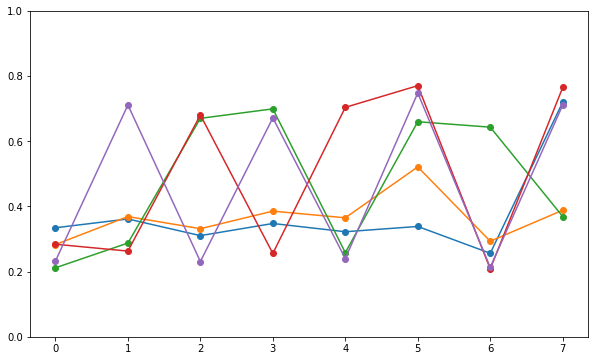

In [149]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data.groupby('c_8').mean()[['STG', 'SCG', 'STR', 'LPR', 'PEG']], marker='o')
ax.set_ylim(0,1)

In [153]:
for i in range(10):
    km_model = KMeans(n_clusters=8, max_iter=100, random_state=i).fit(data[['STG', 'SCG', 'STR', 'LPR', 'PEG']])
    data[f'val_{i}'] = km_model.labels_

In [155]:
data.groupby('c_8').mean()[['STG', 'SCG', 'STR', 'LPR', 'PEG']]

,STG,SCG,STR,LPR,PEG
c_8,,,,,
0,0.334276,0.282697,0.211579,0.283829,0.232237
1,0.361265,0.368676,0.287426,0.262794,0.710735
2,0.310196,0.331451,0.669804,0.680000,0.230784
3,0.347412,0.385324,0.698824,0.255588,0.671176
4,0.322093,0.364814,0.258140,0.703488,0.240000
5,0.338344,0.520969,0.659375,0.770000,0.747500
6,0.256100,0.293000,0.642750,0.208250,0.213075
7,0.719200,0.388200,0.368800,0.764400,0.710400


In [157]:
data.val_0.value_counts()

7    60
5    57
1    57
3    56
6    51
2    44
4    40
0    38
Name: val_0, dtype: int64

In [158]:
data.pivot_table(index='UNS', columns='val_0', values='STG', aggfunc='count')

val_0,0,1,2,3,4,5,6,7
UNS,,,,,,,,
high,20,0,0,24,36,20,2,0
middle,18,13,0,32,4,37,18,0
low,0,36,28,0,0,0,28,37
very_low,0,8,16,0,0,0,3,23


In [156]:
data.groupby('val_0').mean()[['STG', 'SCG', 'STR', 'LPR', 'PEG']]

,STG,SCG,STR,LPR,PEG
val_0,,,,,
0,0.331816,0.726579,0.606316,0.346579,0.725000
1,0.297281,0.354298,0.256491,0.643860,0.233333
2,0.260159,0.297386,0.655000,0.221591,0.219841
3,0.319554,0.251196,0.691607,0.326429,0.697321
4,0.597800,0.419275,0.454750,0.801250,0.703250
5,0.390368,0.316754,0.265000,0.244561,0.701404
6,0.313667,0.332431,0.667255,0.701569,0.246275
7,0.354333,0.278450,0.198333,0.236017,0.227833
